 ## Portfolio Part 4
 ### Task
 
 * Propose well-defined questions or purposes to the analysis
 * It should involve some data preparation and exploration
 * You define a baseline performance with a simple model
 * You will make use of one more analysis/prediction technique from the unit
 * Develop some kind of visualisation of the data or results


## Can We Predict the Days Car Accidents Occurs on Australian Roads

Analysing the road crash report of each state collected by the Bureau of Infrastructure and Transport Research Economics (BITRE).

#### Information:

* Total data that is collected based on incidents each year on roads
* Recorded in each of the Australian states
* Shows the demographic of car crashes
* Shows the vehicles involved

Provided here: [Crash Report](https://www.kaggle.com/datasets/deepcontractor/australian-fatal-car-accident-data-19892021)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Crash = pd.read_csv('Crash_Data.csv')

### Crash Report

In exploring the datasets of the crash report, we need to firstly check the size and information contents that it obtains.

In [5]:
Crash.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [6]:
print("Report size :", Crash.shape)

Report size : (52843, 23)


### Missing Values
Checking if there are any empty or NaN values in the dataset

In [5]:
Crash.isna().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

Since there are null values we need to remove the null values from the dataset

In [6]:
clean_Crash = Crash.dropna()

In [7]:
print("Size of crash report before removing the null values: ", Crash.shape)
print("Size of crash report after removing the null values: ", clean_Crash.shape)

Size of crash report before removing the null values:  (52843, 23)
Size of crash report after removing the null values:  (6787, 23)


### Outliers

* The Australian population is estimated at around 26 million in 2022.
* While population is spread around in each state of Australia
* We need to remove states that has a low density population as there is a likehood of less car accidents to occur. 

#### Population in Each States
1. New South Wales - 7,317,000
2. Victoria - 5,640,900
3. Queensland - 4,599,400
4. Western Australia - 2,366,900
5. South Australia - 1,659,800
6. Tasmania - 511,000
7. Australian Capital Territory - 366,900
8. Northern Territory - 231,200

We need to count the number of crashes in each state collected in the crash report.

In [8]:
clean_Crash['State'].value_counts()

NSW    2306
Vic    1320
Qld     939
WA      897
SA      752
NT      268
Tas     254
ACT      51
Name: State, dtype: int64

In [9]:
remove_outlier_clean_Crash = clean_Crash.drop(clean_Crash.index[(clean_Crash['State'] == 'ACT')])
Tas_remove_outlier_clean_Crash = remove_outlier_clean_Crash.drop(remove_outlier_clean_Crash.index[(remove_outlier_clean_Crash['State'] == 'Tas')])
new_crash_report = Tas_remove_outlier_clean_Crash.drop(Tas_remove_outlier_clean_Crash.index[(Tas_remove_outlier_clean_Crash['State'] == 'NT')])

print('The length of data after removing outlier of three states :', len(new_crash_report))

The length of data after removing outlier of three states : 6214


## Data Exploration

### Data Summarization & Visualisation
Choosing relevant columns to further understand the dataset in determining how many unique values are within each features.

In [10]:
print("State =", new_crash_report['State'].unique())
print("Month =", new_crash_report['Month'].unique())
print("Year =", new_crash_report['Year'].unique())
print("Dayweek =", new_crash_report['Dayweek'].unique())
print("Crash Type =", new_crash_report['Crash Type'].unique())
print("Day of week =", new_crash_report['Day of week'].unique())
print("Time of day =", new_crash_report['Time of day'].unique())

State = ['Qld' 'SA' 'NSW' 'Vic' 'WA']
Month = [ 9  8  7  6  5  4  3  2  1 12 11 10]
Year = [2021 2020 2019 2018 2017 2016 2015 2014]
Dayweek = ['Saturday' 'Thursday' 'Sunday' 'Tuesday' 'Wednesday' 'Friday' 'Monday']
Crash Type = ['Multiple' 'Single']
Day of week = ['Weekend' 'Weekday']
Time of day = ['Night' 'Day']


### States Record of Crashes

Identifying how many reports are recorded in each state.

In [11]:
new_crash_report['State'].value_counts()

NSW    2306
Vic    1320
Qld     939
WA      897
SA      752
Name: State, dtype: int64

Text(0.5, 1.0, 'Number of Crashes in each State')

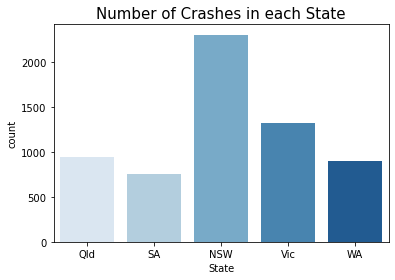

In [12]:
sns.countplot(x='State', data=new_crash_report, palette='Blues')
plt.title("Number of Crashes in each State", size=15)

### Road Crashes Each Year

In [13]:
new_crash_report['Year'].value_counts()

2019    1092
2018    1017
2017     884
2020     858
2015     839
2016     638
2021     620
2014     266
Name: Year, dtype: int64

Text(0.5, 1.0, 'Occurance of Crashes in Each Year')

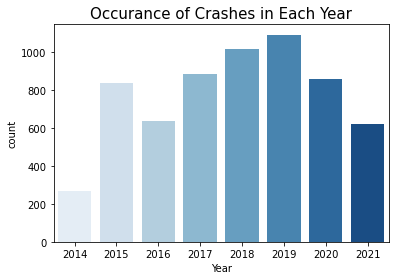

In [14]:
sns.countplot(x='Year', data=new_crash_report, palette='Blues')
plt.title("Occurance of Crashes in Each Year", size=15)

The diagram for the number of crashes in each year is displayed as a slight left skewed histogram. This can then be interpreted as a steady increase in road accidents between the year 2014 to 2019 with a sudden rise in 2015. While starting to slowly decrease after 2019, the cause of this decrease may be affected by the rising concern of the covid-19 pandemic where people in Australia were in mandatory lockdown in staying at home during 2020 and 2021.

### Amount Recorded in Each Day

In [15]:
new_crash_report['Day of week'].value_counts()

Weekday    3793
Weekend    2421
Name: Day of week, dtype: int64

Text(0.5, 1.0, 'Day Type')

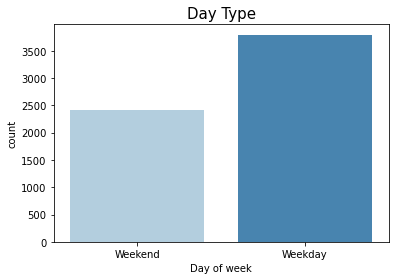

In [16]:
sns.countplot(x='Day of week', data=new_crash_report, palette='Blues')
plt.title("Day Type", size=15)

In [17]:
new_crash_report['Dayweek'].value_counts()

Saturday     1079
Sunday        992
Friday        938
Thursday      814
Monday        809
Wednesday     792
Tuesday       790
Name: Dayweek, dtype: int64

Text(0.5, 1.0, 'Crash Amount in Each Day')

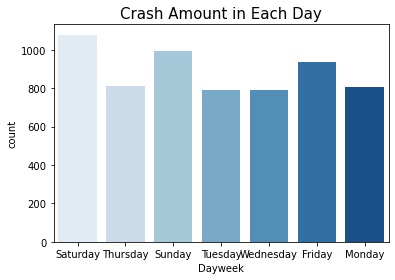

In [18]:
sns.countplot(x='Dayweek', data=new_crash_report, palette='Blues')
plt.title("Crash Amount in Each Day", size=15)

As we analyse both diagrams based on Day Type and the amount in each day, there are more car accidents to occur during the weekday then weekends while the crashes for each day it is moderately equal betwen each of the days. The cause of these crashes occurs during the weekdaysmay be the result of the Austrlian populations work lifestyle. As people are generally in a 9-5 job where during the peak hours of early mornings and afternoons roads are typically busy as traffics can accumulate in an increase of risk for car crashes to happen. However when observing which days accidents occurs the day Saturday happens to be the most during the week.

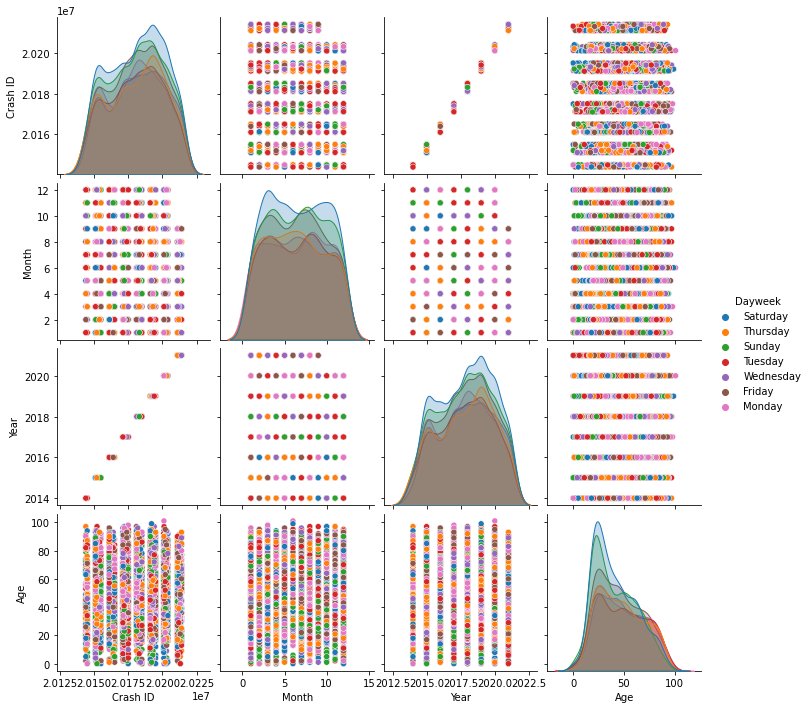

In [19]:
sns.pairplot(new_crash_report, hue="Dayweek")

### Converting  Value Types

In [20]:
from sklearn.preprocessing import OrdinalEncoder

# convert categorical values into numerial values
ord_enc = OrdinalEncoder(dtype=int)
new_crash_report[["State_code", "Dayweek_code", "Time_code", "Crash Type_code", "Bus Involvement_code", "Heavy Rigid Truck Involvement_code", "Articulated Truck Involvement_code", "Road User_code", "Gender_code", "National Remoteness Areas_code", "SA4 Name 2016_code", "National LGA Name 2017_code", "National Road Type_code", "Christmas Period_code", "Easter Period_code", "Age Group_code", "Day of week_code", "Time of day_code"]] = ord_enc.fit_transform(new_crash_report[["State", "Dayweek", "Time", "Crash Type", "Bus Involvement", "Heavy Rigid Truck Involvement", "Articulated Truck Involvement", "Road User", "Gender", "National Remoteness Areas", "SA4 Name 2016", "National LGA Name 2017", "National Road Type", "Christmas Period", "Easter Period", "Age Group", "Day of week", "Time of day"]])
new_crash_report[["State", "State_code", "Dayweek", "Dayweek_code", "Time", "Time_code", "Crash Type", "Crash Type_code", "Bus Involvement", "Bus Involvement_code", "Heavy Rigid Truck Involvement", "Heavy Rigid Truck Involvement_code", "Articulated Truck Involvement", "Articulated Truck Involvement_code", "Road User", "Road User_code", "Gender", "Gender_code", "National Remoteness Areas", "National Remoteness Areas_code", "SA4 Name 2016", "SA4 Name 2016_code", "National LGA Name 2017", "National LGA Name 2017_code", "National Road Type", "National Road Type_code", "Christmas Period", "Christmas Period_code", "Easter Period", "Easter Period_code", "Age Group", "Age Group_code", "Day of week", "Day of week_code", "Time of day", "Time of day_code"]].head(10)

,State,State_code,Dayweek,Dayweek_code,Time,Time_code,Crash Type,Crash Type_code,Bus Involvement,Bus Involvement_code,...,Christmas Period,Christmas Period_code,Easter Period,Easter Period_code,Age Group,Age Group_code,Day of week,Day of week_code,Time of day,Time of day_code
5,Qld,1,Saturday,2,4:00,781,Multiple,0,No,0,...,No,0,No,0,17_to_25,1,Weekend,1,Night,1
9,Qld,1,Saturday,2,2:00,718,Single,1,No,0,...,No,0,No,0,40_to_64,3,Weekend,1,Night,1
10,SA,2,Thursday,4,21:00,601,Single,1,No,0,...,No,0,No,0,17_to_25,1,Weekday,0,Night,1
11,Qld,1,Sunday,3,21:00,601,Multiple,0,No,0,...,No,0,No,0,40_to_64,3,Weekend,1,Night,1
13,NSW,0,Tuesday,5,21:50,638,Single,1,No,0,...,No,0,No,0,26_to_39,2,Weekday,0,Night,1
15,NSW,0,Saturday,2,8:05,938,Single,1,No,0,...,No,0,No,0,26_to_39,2,Weekend,1,Day,0
17,Qld,1,Sunday,3,13:00,184,Single,1,No,0,...,No,0,No,0,40_to_64,3,Weekend,1,Day,0
18,NSW,0,Saturday,2,8:30,957,Single,1,No,0,...,No,0,No,0,0_to_16,0,Weekend,1,Day,0
19,NSW,0,Sunday,3,10:52,79,Single,1,No,0,...,No,0,No,0,40_to_64,3,Weekend,1,Day,0
24,NSW,0,Saturday,2,6:00,849,Single,1,No,0,...,No,0,No,0,17_to_25,1,Weekend,1,Day,0


In [21]:
car_crash_report = new_crash_report


car_crash_report['State'] = car_crash_report['State'].astype('category')
car_crash_report['State'] = car_crash_report['State'].cat.codes


car_crash_report['Dayweek'] = car_crash_report['Dayweek'].astype('category')
car_crash_report['Dayweek'] = car_crash_report['Dayweek'].cat.codes


car_crash_report['Time'] = car_crash_report['Time'].astype('category')
car_crash_report['Time'] = car_crash_report['Time'].cat.codes


car_crash_report['Crash Type'] = car_crash_report['Crash Type'].astype('category')
car_crash_report['Crash Type'] = car_crash_report['Crash Type'].cat.codes


car_crash_report['Bus Involvement'] = car_crash_report['Bus Involvement'].astype('category')
car_crash_report['Bus Involvement'] = car_crash_report['Bus Involvement'].cat.codes


car_crash_report['Heavy Rigid Truck Involvement'] = car_crash_report['Heavy Rigid Truck Involvement'].astype('category')
car_crash_report['Heavy Rigid Truck Involvement'] = car_crash_report['Heavy Rigid Truck Involvement'].cat.codes


car_crash_report['Articulated Truck Involvement'] = car_crash_report['Articulated Truck Involvement'].astype('category')
car_crash_report['Articulated Truck Involvement'] = car_crash_report['Articulated Truck Involvement'].cat.codes


car_crash_report['Road User'] = car_crash_report['Road User'].astype('category')
car_crash_report['Road User'] = car_crash_report['Road User'].cat.codes


car_crash_report['Gender'] = car_crash_report['Gender'].astype('category')
car_crash_report['Gender'] = car_crash_report['Gender'].cat.codes


car_crash_report['National Remoteness Areas'] = car_crash_report['National Remoteness Areas'].astype('category')
car_crash_report['National Remoteness Areas'] = car_crash_report['National Remoteness Areas'].cat.codes


car_crash_report['SA4 Name 2016'] = car_crash_report['SA4 Name 2016'].astype('category')
car_crash_report['SA4 Name 2016'] = car_crash_report['SA4 Name 2016'].cat.codes


car_crash_report['National LGA Name 2017'] = car_crash_report['National LGA Name 2017'].astype('category')
car_crash_report['National LGA Name 2017'] = car_crash_report['National LGA Name 2017'].cat.codes


car_crash_report['National Road Type'] = car_crash_report['National Road Type'].astype('category')
car_crash_report['National Road Type'] = car_crash_report['National Road Type'].cat.codes


car_crash_report['Christmas Period'] = car_crash_report['Christmas Period'].astype('category')
car_crash_report['Christmas Period'] = car_crash_report['Christmas Period'].cat.codes


car_crash_report['Easter Period'] = car_crash_report['Easter Period'].astype('category')
car_crash_report['Easter Period'] = car_crash_report['Easter Period'].cat.codes


car_crash_report['Age Group'] = car_crash_report['Age Group'].astype('category')
car_crash_report['Age Group'] = car_crash_report['Age Group'].cat.codes


car_crash_report['Day of week'] = car_crash_report['Day of week'].astype('category')
car_crash_report['Day of week'] = car_crash_report['Day of week'].cat.codes

car_crash_report['Time of day'] = car_crash_report['Time of day'].astype('category')
car_crash_report['Time of day'] = car_crash_report['Time of day'].cat.codes

In [22]:
 reported_crashes_data = car_crash_report.drop(columns=["State_code", "Dayweek_code", "Time_code", "Crash Type_code", "Bus Involvement_code", "Heavy Rigid Truck Involvement_code", "Road User_code", "Gender_code", "National Remoteness Areas_code", "SA4 Name 2016_code", "National LGA Name 2017_code", "National Road Type_code", "Christmas Period_code", "Easter Period_code", "Age Group_code", "Day of week_code", "Time of day_code"])

In [23]:
reported_crashes_data.head(10)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Articulated Truck Involvement_code
5,20213034,1,9,2021,2,781,0,0,0,0,...,1,9,48,4,0,0,1,1,1,0
9,20213092,1,9,2021,2,718,1,0,0,0,...,1,28,233,7,0,0,3,1,1,0
10,20214053,2,9,2021,4,601,1,0,0,0,...,0,0,1,11,0,0,1,0,1,0
11,20213178,1,9,2021,3,601,0,0,0,0,...,1,22,155,7,0,0,3,1,1,0
13,20211068,0,9,2021,5,638,1,0,0,0,...,0,15,81,3,0,0,2,0,1,0
15,20211169,0,9,2021,2,938,1,0,0,0,...,0,53,389,9,0,0,2,1,0,0
17,20213169,1,9,2021,3,184,1,0,0,0,...,2,80,357,11,0,0,3,1,0,0
18,20211088,0,9,2021,2,957,1,0,0,0,...,2,54,77,9,0,0,0,1,0,0
19,20211025,0,9,2021,3,79,1,0,0,0,...,2,17,259,11,0,0,3,1,0,0
24,20211011,0,9,2021,2,849,1,0,0,0,...,0,39,328,9,0,0,1,1,0,0


### Descriptive Statistic

In the section we can find out the Crash reports information and correlation of:
* Mean 
* Standard deiviation
* Minimum value
* Maximum value
* The correlation of each feature to the another features

In [24]:
reported_crashes_data.describe()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Articulated Truck Involvement_code
count,6.214000e+03,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,...,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000
mean,2.018084e+07,1.607821,6.407145,2017.827325,2.880753,469.855327,0.556968,0.018507,0.071612,0.089314,...,1.075153,40.143708,229.591407,6.874477,0.031220,0.013357,2.606212,0.389604,0.375443,0.089314
std,1.995926e+04,1.507279,3.431703,2.012424,1.956004,287.958773,0.496784,0.134785,0.257866,0.285220,...,1.014295,23.501203,127.913977,2.981786,0.173925,0.114807,1.379613,0.487700,0.484276,0.285220
min,2.014400e+07,0.000000,1.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.016406e+07,0.000000,3.000000,2016.000000,1.000000,230.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,121.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2.018213e+07,1.000000,6.000000,2018.000000,3.000000,434.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,39.000000,235.500000,7.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,2.019508e+07,3.000000,9.000000,2019.000000,5.000000,709.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,57.000000,346.000000,9.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000
max,2.021407e+07,4.000000,12.000000,2021.000000,6.000000,1016.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,80.000000,448.000000,12.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [25]:
reported_crashes_data.corr()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Articulated Truck Involvement_code
Crash ID,1.000000,-0.113791,-0.109750,0.997537,0.010160,-0.009389,0.017637,-0.023584,-0.025000,0.012128,...,-0.027341,-0.071158,-0.023313,0.157497,-0.027562,0.018654,-0.002992,0.007693,0.015106,0.012128
State,-0.113791,1.000000,0.013511,-0.165385,-0.012699,0.004610,0.021351,0.010379,-0.031257,-0.032700,...,0.070447,0.047769,-0.046875,-0.090207,-0.004247,0.007023,-0.031786,-0.002526,0.024245,-0.032700
Month,-0.109750,0.013511,1.000000,-0.111430,0.000760,0.006483,0.013394,0.004238,-0.020222,-0.019398,...,0.039345,0.000737,-0.001551,0.015849,0.150208,-0.086523,-0.017396,0.015320,0.012216,-0.019398
Year,0.997537,-0.165385,-0.111430,1.000000,0.011328,-0.008870,0.014751,-0.023227,-0.022071,0.012853,...,-0.042293,-0.075265,-0.022348,0.158236,-0.027362,0.017647,0.001360,0.007059,0.013518,0.012853
Dayweek,0.010160,-0.012699,0.000760,0.011328,1.000000,0.007834,-0.029531,0.036455,0.001297,0.047944,...,-0.017386,-0.008164,-0.012553,0.012860,0.027031,-0.061713,0.046416,-0.293631,-0.048732,0.047944
Time,-0.009389,0.004610,0.006483,-0.008870,0.007834,1.000000,0.073136,-0.008743,0.008500,0.010254,...,-0.006063,0.002675,-0.003224,-0.004489,-0.013317,0.019226,-0.145599,0.050960,0.287576,0.010254
Crash Type,0.017637,0.021351,0.013394,0.014751,-0.029531,0.073136,1.000000,-0.065025,-0.195815,-0.230727,...,0.094516,-0.002583,-0.009057,-0.024835,0.003629,-0.006289,-0.066014,0.084090,0.176349,-0.230727
Bus Involvement,-0.023584,0.010379,0.004238,-0.023227,0.036455,-0.008743,-0.065025,1.000000,-0.033506,-0.026256,...,0.008662,0.015776,-0.004883,-0.027859,-0.010919,-0.005576,0.017559,-0.031352,-0.032490,-0.026256
Heavy Rigid Truck Involvement,-0.025000,-0.031257,-0.020222,-0.022071,0.001297,0.008500,-0.195815,-0.033506,1.000000,-0.023514,...,-0.007042,0.006854,0.007660,0.007925,-0.031914,-0.021442,0.015037,-0.133581,-0.114803,-0.023514
Articulated Truck Involvement,0.012128,-0.032700,-0.019398,0.012853,0.047944,0.010254,-0.230727,-0.026256,-0.023514,1.000000,...,0.049677,0.027355,0.046718,0.100808,0.011917,-0.002031,0.009634,-0.104404,-0.022572,1.000000


### Logistic Regression

We need to perform a simple model to use in predicting our values in the training set for testing the dataset. The simplest model will be a Logistic Regression.

In [38]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [39]:
train, test = train_test_split(reported_crashes_data, test_size=0.2, random_state=142)
X_train = train.drop(['Articulated Truck Involvement_code'], axis=1)
y_train = train['Dayweek']
X_test = test.drop(['Articulated Truck Involvement_code'], axis=1)
y_test = test['Dayweek']
print(X_train.shape)
print(X_test.shape)

(4971, 23)
(1243, 23)


In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [41]:
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

In [42]:
## comparing the rmse results of train and test to see whether the average error of predictions improved
mae_train = np.mean(np.abs(y_train - pred_train))
mae_test = np.mean(np.abs(y_test - pred_test))


mse_test = ((np.array(y_train)-pred_train)**2).sum()/len(y_train)
mse_train = ((np.array(y_test)-pred_test)**2).sum()/len(y_test)

mse = mean_squared_error(y_train, pred_train)
rmse_train = sqrt(mse)

mse = mean_squared_error(y_test, pred_test)
rmse_test = sqrt(mse)

In [43]:
print("===Train set results===")
print("Train model mae:", mae_train)
print("Train model mse:", mse_train)
print("Train model rmse:", rmse_train)
print("===Train set results===")
print("Test model mae:", mae_test)
print("Test model mse:", mse_test)
print("Test model rmse:", rmse_test)

===Train set results===
Train model mae: 1.743713538523436
Train model mse: 4.691069991954948
Train model rmse: 2.1397559726779933
===Train set results===
Test model mae: 1.749798873692679
Test model mse: 4.578555622611145
Test model rmse: 2.165887806871572


In [44]:
print("Accuracy score on training set: ", accuracy_score(y_train, pred_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, pred_test))

Accuracy score on training set:  0.1707905853952927
Accuracy score on testing set:  0.1850362027353178


### Logistic Regression Results

#### Mean Absolute Error Score
* Both the training and testing have similar results
* The predicted values are closely near the actual values 

#### Mean Squared Error Score
* Training set has a highest result than the testing set 
* In the train set the mse of 5.04 is a sign of a higer chance in errors in the model however the testing set is slightly improve by only half the result of the training set

#### Root Square Error Score 
* Both the training and testing have similar results

#### Accuracy score 
* Both training and testing accuracy score are similar 
* Both models are genrally the same

### K-Nearest Neighbor

To determine if we can create a better performance than the logistic Regression model. The K-Nearnest Neighbor will be the model to see if the accuracy score of the dataset is improved.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [46]:
x = car_crash_report
y = car_crash_report['Dayweek']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=142)
knn_model = KNeighborsRegressor(n_neighbors=3)
clf = KNeighborsClassifier(p=1)

In [48]:
clf.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
## comparing the rmse results of train and test to see whether the average error of predictions improved
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
train_rmse = sqrt(mse)

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
test_rmse = sqrt(mse)

train_mae = np.mean(np.abs(y_train - train_preds))
test_mae = np.mean(np.abs(y_test - predictions))

train_mse = ((np.array(y_train)-train_preds)**2).sum()/len(y_train)
test_mse = ((np.array(y_test)-test_preds)**2).sum()/len(y_test)

In [50]:
print("===Train set results===")
print("Train model mae:", train_mae)
print("Train model mse:", train_mse)
print("Train model rmse:", train_mse)
print("===Train set results===")
print("Test model mae:", test_mae)
print("Test model mse:", test_mse)
print("Test model rmse:", test_rmse)

===Train set results===
Train model mae: 1.2643331321665583
Train model mse: 2.4707972909542013
Train model rmse: 2.4707972909542013
===Train set results===
Test model mae: 2.079646017699115
Test model mse: 5.043890229730938
Test model rmse: 2.2458606879615077


### K-Nearest Neighbor Results

#### Mean Absolute Error Score
* Testing set has a small increase result than the training set
* The predicted values of the training set are closely near the actual values 

#### Mean Squared Error Score
* Training set has a highest result than the testing set 
* In the testing set the mse of 5.04 is a sign of a higer chance in errors in the model however the training set is slightly improve by only half the result of the training set

#### Root Square Error Score 
* Both the training and testing have similar results

#### Accuracy score
* There is a slight improvement in the performance when using the K-Nearest Neighbor

In [51]:
print(" Test Accuracy score: ", accuracy_score(y_test, predictions))

 Test Accuracy score:  0.20514883346741755


### Feature Selection

Deciding to chose the most relevant features for the crash report

In [52]:
reg = LogisticRegression()
rfe = RFE(estimator=reg, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [53]:
rfe.ranking_

array([ 1, 25, 15,  2, 10,  4, 28, 40, 32, 35,  7, 21, 30,  8, 22, 12,  6,
       19, 37, 38, 16, 14, 26, 24,  9,  3, 29, 41, 33, 34, 20, 31, 23, 11,
        5, 18, 36, 39, 17, 13, 27])

In [54]:
X_train.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day',
       'State_code', 'Dayweek_code', 'Time_code', 'Crash Type_code',
       'Bus Involvement_code', 'Heavy Rigid Truck Involvement_code',
       'Articulated Truck Involvement_code', 'Road User_code', 'Gender_code',
       'National Remoteness Areas_code', 'SA4 Name 2016_code',
       'National LGA Name 2017_code', 'National Road Type_code',
       'Christmas Period_code', 'Easter Period_code', 'Age Group_code',
       'Day of week_code', 'Time of day_code'],
      dtype='object')

### Evaluation of Feature Selection

When the dataset of the Crash report is fitted into the predicted model of the logistic Regression and the K-Nearest Neighbor the accuracy score of the model are identically the same. With the feature selections in the model we can concluide that the best features to uses are the CrashID as it records all the incidents on roads while the worst feature within the model is the Crash type as the type of crashes is unreliable within the model.